In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import AgglomerativeClustering
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df = pd.read_parquet(r'/Users/apple/BDML/data/theta_transposed_сс_rus.parquet.gzip')
len(df)

3622610

In [3]:
df_t = pd.DataFrame()
df_t['theme'] = df.drop(columns=['owner_id','text']).idxmax(axis=1)
df_t['coef'] = 1 
df_t['owner_id'] = df['owner_id']

group_user = pd.read_csv(r'/Users/apple/BDML/data/group_user.csv') \
    .rename(columns = {'group':'owner_id'})


interests = group_user \
    .merge(df_t, on = 'owner_id' ) \
    .drop(['owner_id'], axis = 1) \
    .sort_values('user')


interests.set_index('user', inplace = True)
interests.head()

,theme,coef
user,,
138,фото фотография шоу фотограф свадьба,1
138,школа год искать тема,1
138,фильм серия кино игра,1
138,кофе чай вкус,1
138,билет вход музыка клуб,1


In [4]:
interests = interests \
    .reset_index() \
    .pivot_table(index = 'user', 
                 columns='theme', 
                 aggfunc='sum') \
    .replace(np.nan, 0) 

interests.head()

coef                          \
theme   дома ремонт работа монтаж автомобиль авто машина    
user                                                        
138                           0.0                     1.0   
175                           2.0                     0.0   
176                           2.0                     0.0   
200                           3.0                     2.0   
252                           1.0                     0.0   

                                                                       \
theme бизнес клиент компания который интернет билет вход музыка клуб    
user                                                                    
138                                       1.0                     4.0   
175                                      34.0                     0.0   
176                                       0.0                     0.0   
200                                       3.0                     1.0   
252                                       2.0                     0.0   

                                                         \
theme волос маникюр   запись год война ссср время армия   
user                                                      
138                      0.0                        0.0   
175                      1.0                        5.0   
176                      0.0                        1.0   
200                      0.0                       41.0   
252                      0.0                        1.0   

                                                                \
theme год кино театр спектакль группа концерт альбом песня рок   
user                                                             
138                        2.0                             1.0   
175                        4.0                             1.0   
176                        0.0                             0.0   
200                       20.0                             1.0   
252                        1.0                             1.0   

                                                  ...  \
theme игра команда место книга язык слово читать  ...   
user                                              ...   
138                  2.0                     0.0  ...   
175                 10.0                     6.0  ...   
176                  0.0                     1.0  ...   
200                  2.0                     4.0  ...   
252                  0.0                     1.0  ...   

                                                          \
theme отдых море   день стоимость работа год график день   
user                                                       
138                           3.0                    0.0   
175                          10.0                    3.0   
176                           0.0                    0.0   
200                          10.0                    1.0   
252                           1.0                    3.0   

                                                        \
theme размер платье наличие ткань ребенок это родитель   
user                                                     
138                           1.0                  0.0   
175                           0.0                  1.0   
176                           0.0                  0.0   
200                           0.0                  0.0   
252                           0.0                  0.0   

                                                                      \
theme ряд handmade ручнаяработа что петля лицо фильм серия кино игра   
user                                                                   
138                                        0.0                   4.0   
175                                        0.0                  16.0   
176                                        1.0                   0.0   
200                                        2.0                   2.0   
252                                        0.0

In [5]:
interests.columns = interests.columns.get_level_values(1)
interests.columns = [''.join(col).strip() for col in interests.columns.values]

In [6]:
interests = interests.T
interests = (100. * interests / interests.sum())
interests = interests.T
interests.tail(4)

,дома ремонт работа монтаж,автомобиль авто машина,бизнес клиент компания который интернет,билет вход музыка клуб,волос маникюр запись,год война ссср время армия,год кино театр спектакль,группа концерт альбом песня рок,игра команда место,книга язык слово читать,...,отдых море день стоимость,работа год график день,размер платье наличие ткань,ребенок это родитель,ряд handmade ручнаяработа что петля лицо,фильм серия кино игра,фото фотография шоу фотограф свадьба,футбол матч россия мск сегодня победа,цвет цветок стиль интерьер,школа год искать тема
user,,,,,,,,,,,,,,,,,,,,,
443202777,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,25.0,0.000000,0.000000,...,25.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
443212325,33.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,66.666667,0.000000
443331124,3.703704,0.0,0.0,0.0,0.0,3.703704,7.407407,0.0,7.407407,3.703704,...,0.000000,3.703704,0.000000,3.703704,22.222222,0.000000,0.0,0.0,3.703704,7.407407
443374184,11.764706,0.0,0.0,0.0,0.0,11.764706,23.529412,0.0,0.000000,0.000000,...,17.647059,0.000000,11.764706,0.000000,0.000000,11.764706,0.0,0.0,0.000000,0.000000


In [79]:
# creating age groups
vk_user = pd.read_csv(r'/Users/apple/BDML/data/vk_profiles.csv')
age_sex = vk_user.loc[:, :'sex'].rename(columns = {'id': 'user'})
age_sex['age_group'] = pd.cut(age_sex.age, [0, 14, 20, 27, 36, 45, 54, 63, 72, 81])

groups = age_sex.loc[:,'age_group'].unique().astype(str)
age_sex['age_group'] = age_sex['age_group'].astype(str)

In [80]:
grouping = dict()
ingroup_clusters = dict()
for o in range(2):
    for i in groups:
        
        grouping[str(i)+"_"+str(o)] = age_sex \
            .loc[(age_sex['sex'] == o) & (age_sex['age_group'] == i)]
        
        
        grouping[str(i)+"_"+str(o)] = grouping[str(i)+"_"+str(o)].merge(interests, on = 'user')


In [81]:
grouping['(36.0, 45.0]_1'].loc[:, (grouping['(36.0, 45.0]_1'] != 0).any(axis=0)].head(10)

,user,age,sex,age_group,дома ремонт работа монтаж,автомобиль авто машина,бизнес клиент компания который интернет,билет вход музыка клуб,волос маникюр запись,год война ссср время армия,...,отдых море день стоимость,работа год график день,размер платье наличие ткань,ребенок это родитель,ряд handmade ручнаяработа что петля лицо,фильм серия кино игра,фото фотография шоу фотограф свадьба,футбол матч россия мск сегодня победа,цвет цветок стиль интерьер,школа год искать тема
0,176,37,1,"(36.0, 45.0]",20.000000,0.000000,0.000000,0.000000,0.0,10.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,20.000000,0.000000
1,200,37,1,"(36.0, 45.0]",2.884615,1.923077,2.884615,0.961538,0.0,39.423077,...,9.615385,0.961538,0.000000,0.000000,1.923077,1.923077,2.884615,0.000000,3.846154,1.923077
2,252,39,1,"(36.0, 45.0]",5.882353,0.000000,11.764706,0.000000,0.0,5.882353,...,5.882353,17.647059,0.000000,0.000000,0.000000,5.882353,5.882353,0.000000,5.882353,11.764706
3,1221,43,1,"(36.0, 45.0]",0.000000,0.000000,2.380952,2.380952,0.0,14.285714,...,9.523810,2.380952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,16.666667
4,5463,38,1,"(36.0, 45.0]",0.000000,0.000000,23.529412,0.000000,0.0,20.588235,...,0.000000,11.764706,2.941176,0.000000,0.000000,11.764706,2.941176,2.941176,0.000000,0.000000
5,9856,39,1,"(36.0, 45.0]",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,10236,38,1,"(36.0, 45.0]",3.982301,1.769912,3.097345,19.469027,0.0,5.309735,...,2.654867,0.000000,0.000000,5.309735,0.000000,8.407080,0.884956,0.884956,1.769912,0.884956
7,12962,38,1,"(36.0, 45.0]",2.272727,2.272727,6.818182,0.000000,0.0,9.090909,...,18.181818,6.818182,2.272727,0.000000,0.000000,2.272727,2.272727,0.000000,0.000000,9.090909
8,13398,38,1,"(36.0, 45.0]",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333
9,15158,39,1,"(36.0, 45.0]",0.000000,14.285714,28.571429,14.285714,0.0,0.000000,...,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.285714


In [82]:
for a in grouping:
    ingroup_clusters[a] = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward') \
        .fit(grouping[a].drop(columns = ['user','age','sex','age_group']))
    grouping[a]['ag_lables'] = ingroup_clusters[a].labels_

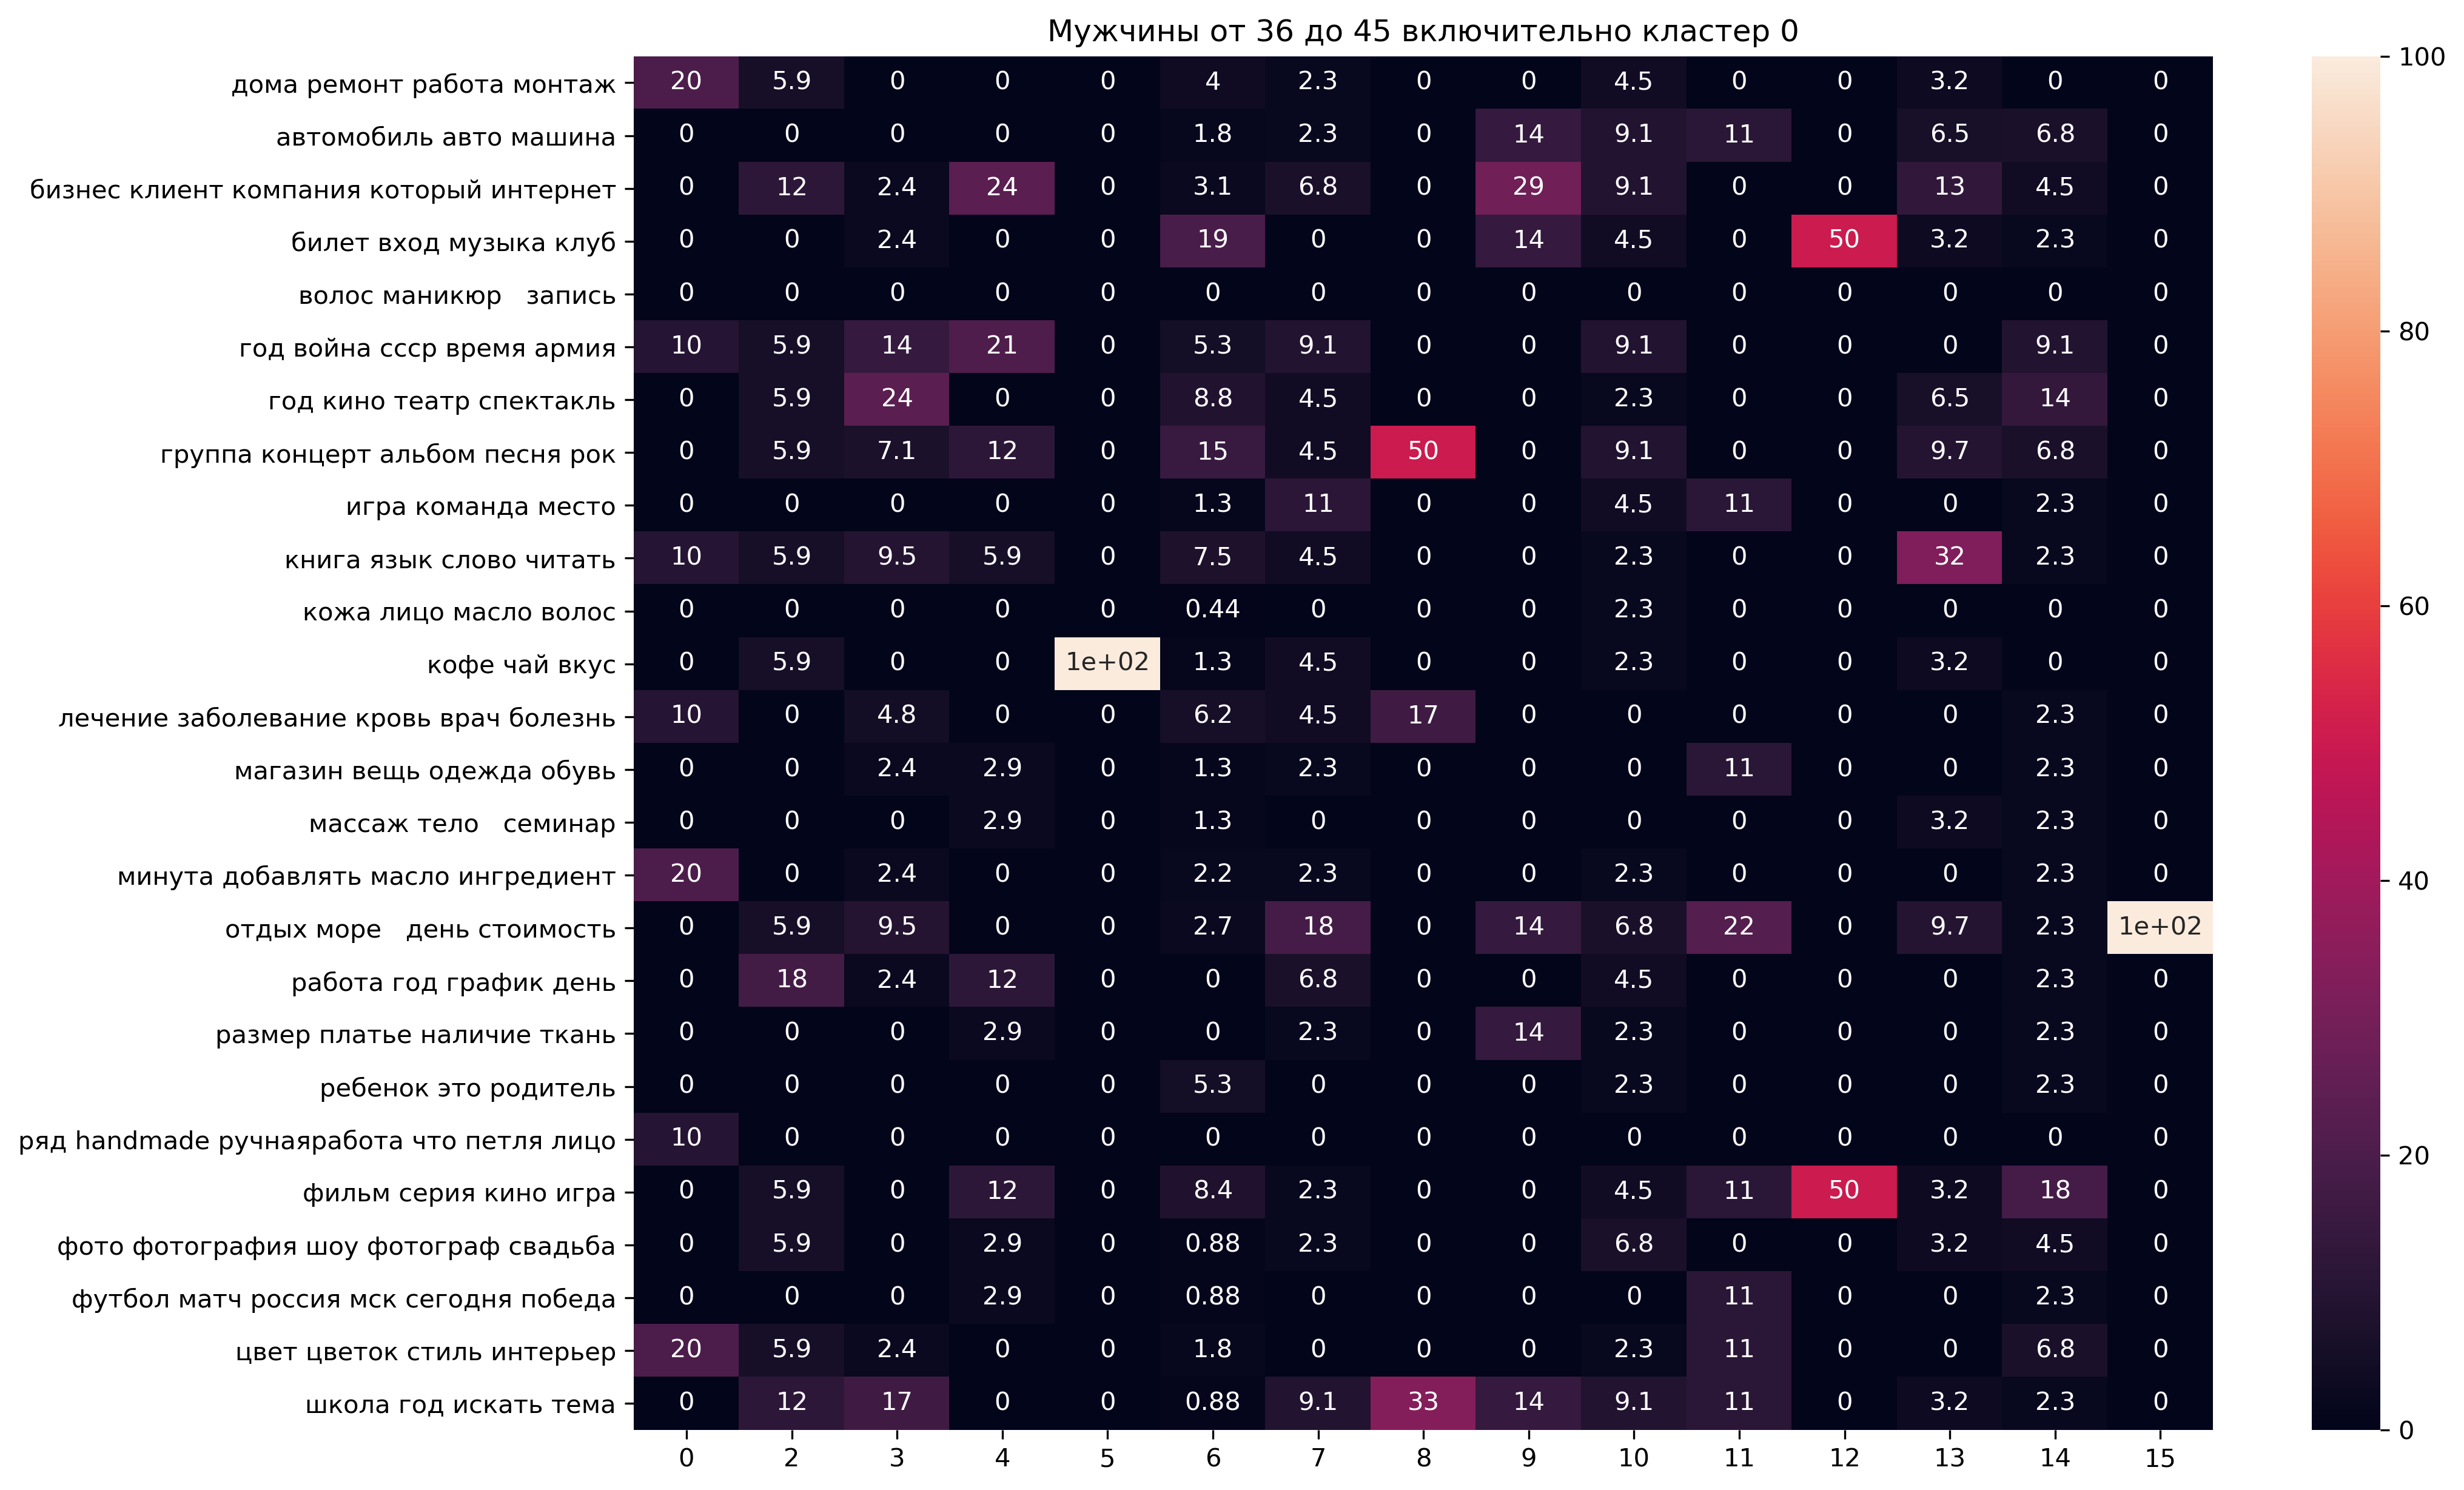

In [83]:
%matplotlib inline

figure(num=None, figsize=(14, 10), dpi=300)
a = grouping['(36.0, 45.0]_1'] \
                   .drop(columns = ['user','age','sex','age_group']) \
                   .loc[grouping['(36.0, 45.0]_1']['ag_lables'] == 0] \
                   .drop(columns = 'ag_lables') \
                   .iloc[:15,:]
ax = plt.axes()
ax.set_title('Мужчины от 36 до 45 включительно кластер 0')
sb.heatmap(a.T, annot = True)

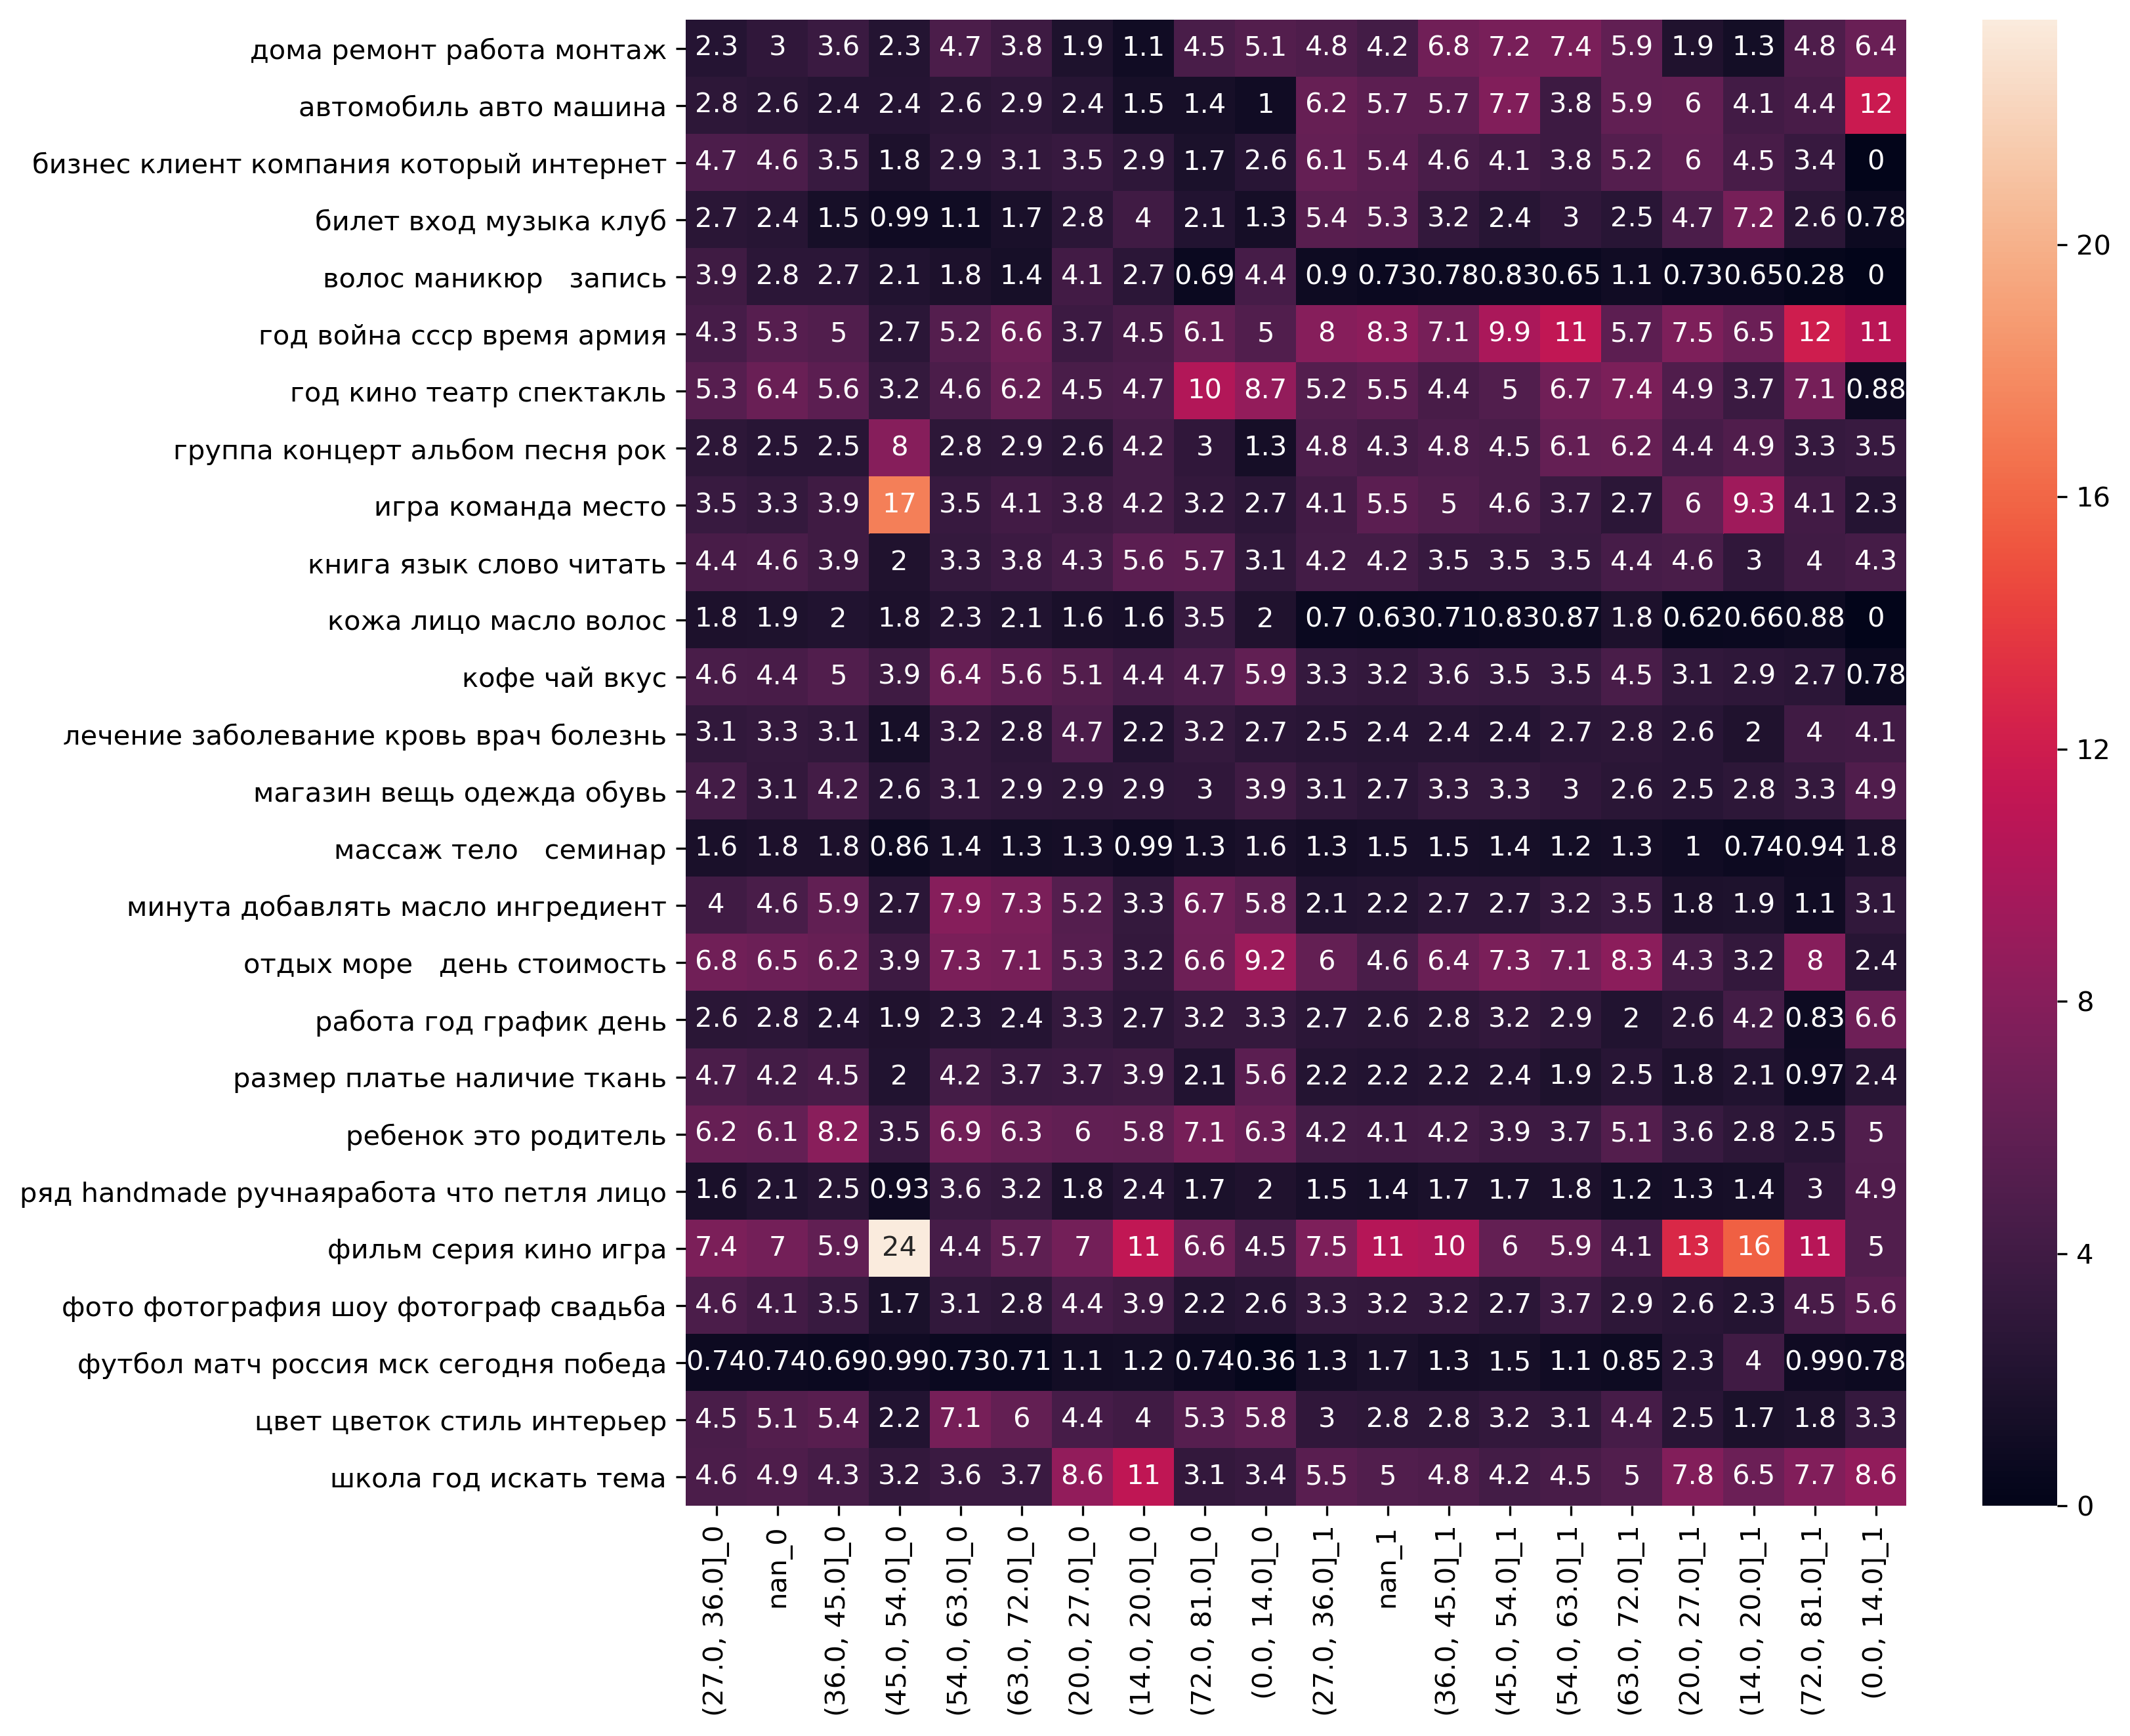

In [84]:
hm = pd.DataFrame()
for i in grouping:
    hm[i] =  grouping[i] \
                .drop(columns = ['user','age','sex','age_group']) \
                .loc[grouping[i]['ag_lables'] == 0] \
                .drop(columns = 'ag_lables') \
                .mean()


figure(num=None, figsize=(10, 10), dpi=300)
#hm.iloc[:40,:]
heat_map = sb.heatmap(hm.iloc[:40,:], annot=True)
plt.show(heat_map)

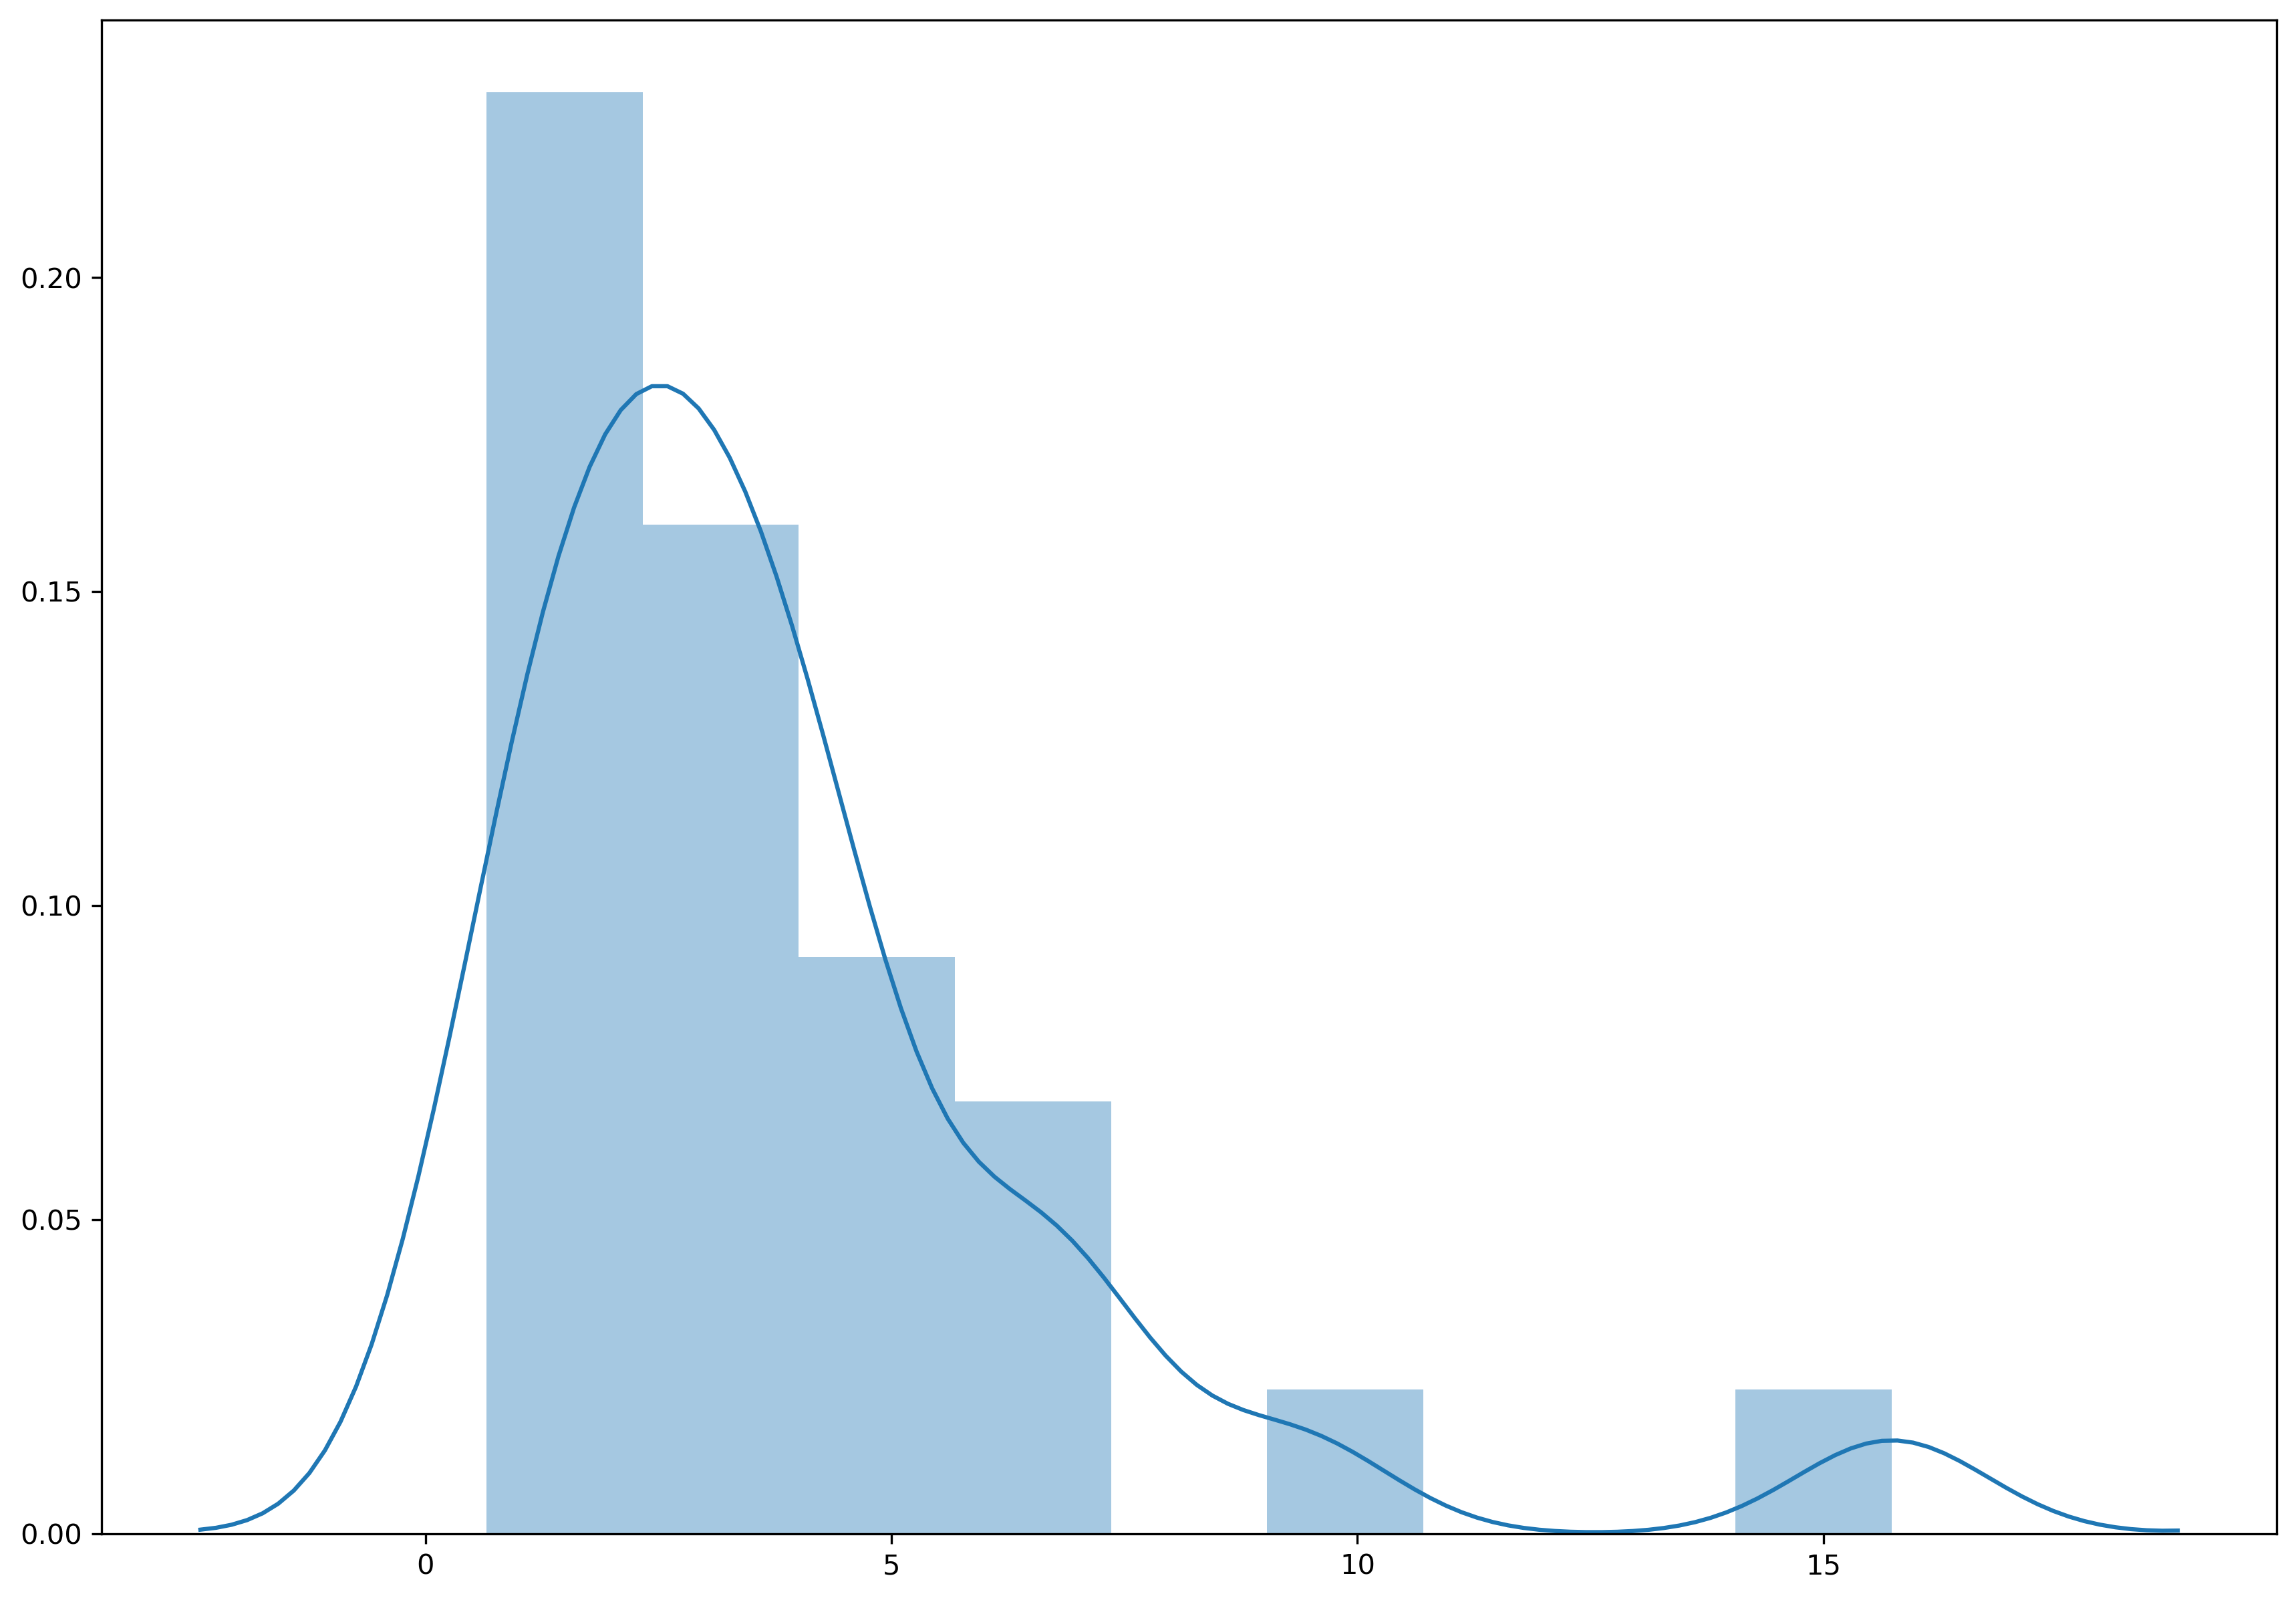

In [97]:
%matplotlib inline

figure(num=None, figsize=(14, 10), dpi=300)


a =  grouping['(14.0, 20.0]_1'] \
                .drop(columns = ['user','age','sex','age_group']) \
                .loc[grouping['(14.0, 20.0]_1']['ag_lables'] == 0] \
                .drop(columns = 'ag_lables') \
                .mean()

heat_map = sb.distplot(pd.DataFrame(a).T)
plt.show(heat_map)

In [99]:
pd.DataFrame(a).T.to_csv('a.csv')

In [98]:
a

дома ремонт работа монтаж                    1.260339
автомобиль авто машина                       4.075207
бизнес клиент компания который интернет      4.479203
билет вход музыка клуб                       7.163644
волос маникюр   запись                       0.653509
год война ссср время армия                   6.451963
год кино театр спектакль                     3.680273
группа концерт альбом песня рок              4.930380
игра команда место                           9.346521
книга язык слово читать                      3.037796
кожа лицо масло волос                        0.662368
кофе чай вкус                                2.905252
лечение заболевание кровь врач болезнь       2.025323
магазин вещь одежда обувь                    2.811576
массаж тело   семинар                        0.736628
минута добавлять масло ингредиент            1.855276
отдых море   день стоимость                  3.220640
работа год график день                       4.154917
размер платье наличие ткань 

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors
import random
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 26)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(pd.DataFrame(a).T.columns)
sizes = a.values# only "explode" the 2nd slice (i.e. 'Hogs')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

fig1, ax1 = plt.subplots(figsize=(10, 10),dpi=300)

ax1.hist(sizes,   autopct='%1.1f%%', colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

AttributeError: 'Rectangle' object has no property 'autopct'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2f0f33d68>]],
      dtype=object)

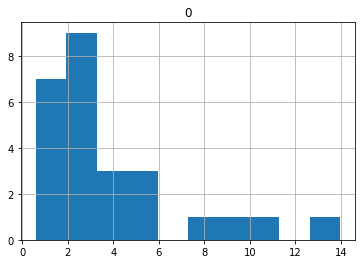

In [95]:
pd.DataFrame(a).reset_index().hist()

In [96]:
pd.DataFrame(a).reset_index()

,index,0
0,дома ремонт работа монтаж,2.982360
1,автомобиль авто машина,3.646345
2,бизнес клиент компания который интернет,4.715232
3,билет вход музыка клуб,8.303521
4,волос маникюр запись,0.596235
5,год война ссср время армия,5.846212
6,год кино театр спектакль,3.267275
7,группа концерт альбом песня рок,4.802155
8,игра команда место,8.747445
9,книга язык слово читать,3.186572


In [92]:
a

дома ремонт работа монтаж                    2.982360
автомобиль авто машина                       3.646345
бизнес клиент компания который интернет      4.715232
билет вход музыка клуб                       8.303521
волос маникюр   запись                       0.596235
год война ссср время армия                   5.846212
год кино театр спектакль                     3.267275
группа концерт альбом песня рок              4.802155
игра команда место                           8.747445
книга язык слово читать                      3.186572
кожа лицо масло волос                        0.613555
кофе чай вкус                                2.756886
лечение заболевание кровь врач болезнь       1.630469
магазин вещь одежда обувь                    2.087720
массаж тело   семинар                        0.656936
минута добавлять масло ингредиент            2.160725
отдых море   день стоимость                  2.477014
работа год график день                       3.844256
размер платье наличие ткань 